In [50]:
import pandas as pd
import numpy as np
import networkx
import networkx.convert_matrix as nx
import pyvis
import graphviz
from pyvis.network import Network
import pyvis.network as net
import pydot
import random
# https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
# https://github.com/ewenme/transfers
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# https://github.com/MridulS/pydata-networkx

In [22]:
import sys
!{sys.executable} -m pip install pydot

In [3]:
BuLi19 = pd.read_csv("2019_german_bundesliga_1.csv")
PL19 = pd.read_csv("2019_english_premier_league.csv")
SA19 = pd.read_csv("2019_italian_serie_a.csv")
PD19 = pd.read_csv("2019_spanish_primera_division.csv")
L1_19 = pd.read_csv("2019_french_ligue_1.csv")

In [4]:
DF19 = pd.concat([BuLi19, PL19, SA19, PD19, L1_19])

In [31]:
DF19.shape

(655, 3)

## Clean the Data

In [7]:
def DelCol(DF):
    DF = DF.loc[DF["transfer_movement"]=="in"] # only one direction of transfers should be considered
    DF = DF.loc[DF["fee_cleaned"]>0] # only "real" transfers
    del DF["player_name"]
    del DF["transfer_movement"]
    del DF["age"]
    del DF["position"]
    del DF["fee"]
    del DF["league_name"]
    del DF["transfer_period"]
    del DF["year"]
    del DF["season"]
    return(DF)



In [8]:
DF19 = DelCol(DF19)

In [20]:
BuLi19["colour"] = "red"
print(BuLi19)

           club_name club_involved_name  fee_cleaned colour
0      Bayern Munich    Atlético Madrid        72.00    red
1      Bayern Munich      VfB Stuttgart        31.50    red
2      Bayern Munich    Bor. M'gladbach        10.80    red
3      Bayern Munich       FC Barcelona         7.65    red
4      Bayern Munich              Inter         4.50    red
..               ...                ...          ...    ...
535       Hertha BSC      VfB Stuttgart         9.00    red
552    FC Schalke 04       FC Barcelona         1.35    red
553    FC Schalke 04        FC Augsburg         0.45    red
574  SC Paderborn 07          Vålerenga         0.36    red
575  SC Paderborn 07            Norwich         0.18    red

[114 rows x 4 columns]


['blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue']


In [10]:
G = nx.from_pandas_edgelist(DF19, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

In [45]:

l = ["red", "blue"]
print(len(G.nodes))
Colours = random.choices(l, k=len(G.nodes))

336


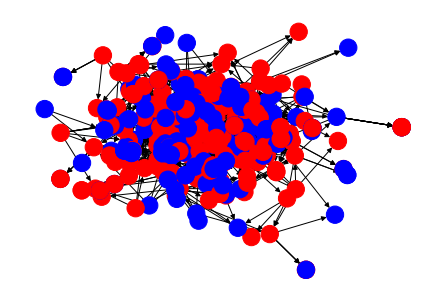

In [46]:
networkx.draw_kamada_kawai(G,node_color = Colours, with_labels=False)

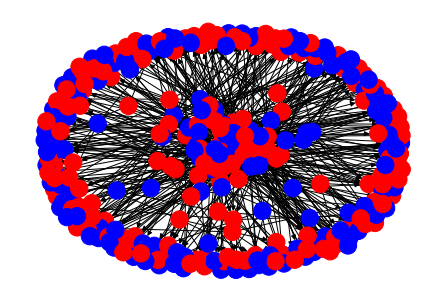

In [47]:
networkx.draw_spring(G,node_color = Colours, with_labels=False)

In [14]:
net = Network(notebook=True)
net.from_nx(G)
net.show("Test.html")
# net.save_graph("Test.html")

## Pyvis

In [72]:
g = Network(notebook=True)

In [73]:
g.add_nodes(np.array(G.nodes), color = random.choices(["red","grey"], k=len(G.nodes)))

In [74]:
#g.add_edges(DF19["club_name"],DF19["club_involved_name"], value =DF19["fee_cleaned"])

In [75]:
for i in range(DF19.shape[0]):
    g.add_edge(DF19["club_name"].iloc[i], 
              DF19["club_involved_name"].iloc[i],
              value=DF19["fee_cleaned"].iloc[i])


In [76]:
g.show("Test.html")

In [77]:
g.save_graph("Test2.html")

In [60]:
DF19.shape[0]

655

## Colours

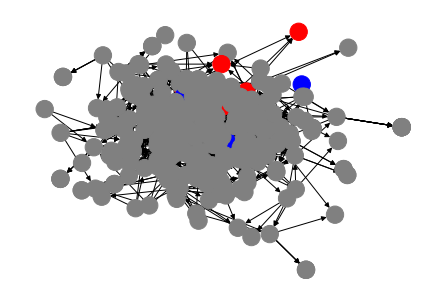

In [30]:
BuLi19Lst = ["Bayern Munich", "Bor. M'gladbach", "Borussia Dortmund", "TSG Hoffenheim", "Bay. Leverkusen"]
BuLi19Lst = pd.Series(BuLi19Lst)
PL19Lst = ["Manchester City","Liverpool FC","Chelsea FC"  ]
PL19Lst = pd.Series(PL19Lst)
color_map = []

for node in G:
    if (np.sum(BuLi19Lst.isin([node])) == 0 and np.sum(PL19Lst.isin([node]))==0): # keine Bundesliga
        color_map.append("grey")
    elif np.sum(PL19Lst.isin([node])) > 0:
        color_map.append("blue")
    elif (np.sum(BuLi19Lst.isin([node])) > 0): 
        color_map.append('red')
        

networkx.draw_kamada_kawai(G, node_color = color_map,with_labels=False)

In [45]:
# Colours
BuLi19Lst= ["Bayern Munich", "Bor. M'gladbach", "Borussia Dortmund", "TSG Hoffenheim", "Bay. Leverkusen"]
BuLi19Lst = pd.Series(BuLi19Lst)
#print(BuLi19Lst)
color_map = []

for node in G:
    if np.sum(BuLi19Lst.isin([node])) == 0: # keine Bundesliga
        color_map.append("blue")
    else: 
        color_map.append('red')

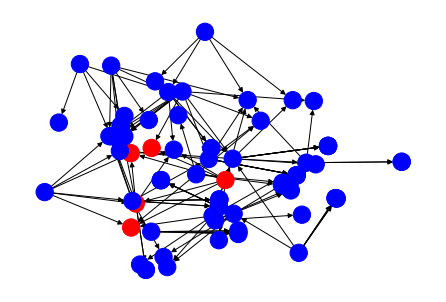

In [78]:
networkx.draw_kamada_kawai(G, node_color = color_map,with_labels=False)

In [57]:
# Create a pd.Series of the nodes

nodes = set(BuLi19["club_name"]) | set(BuLi19["club_involved_name"])
print(len(nodes))
nodes= np.array(nodes)
nodes = pd.Series(nodes)#, np.arange(len(nodes)))
print(nodes)

83
0    {'Everton', 'Paris SG', 'Hamburger SV', 'Våler...
dtype: object


In [79]:
## pyvis
from pyvis.network import Network
net = Network(notebook=True)
net.from_nx(G)
net.show("Test.html")
# net.save_graph("Test.html")


In [ ]:
# https://pyvis.readthedocs.io/en/latest/tutorial.html

## Analysis

In [18]:
G_undir = nx.from_pandas_edgelist(BuLi19, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr="fee_cleaned"
                           )

In [19]:
from networkx.algorithms import approximation

approximation.average_clustering(G_undir, trials=1000, seed=10)

0.041

# Test: verschiedene Farben

In [25]:
networkx.draw_networkx_nodes(G, nodelist=[0,1,2], node_color="tab:red", **options)
#networkx.draw_networkx_nodes(G, pos, nodelist=[50:114], node_color="tab:blue", **options)

# edges
#networkx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

NameError: name 'options' is not defined

In [67]:
type(nodes)

pandas.core.series.Series

In [60]:
edges = BuLi19[["club_name", "club_involved_name", "fee_cleaned"]]

In [64]:
from pyvis.network import Network
net = Network()
net.add_nodes(nodes[0], color = BuLi19["colour"])
net.add_edge()

TypeError: len() of unsized object

In [77]:
from pyvis.network import Network

g = Network()
g.add_nodes([1,2,3], value=[10, 100, 400],
                         label=['NODE 1', 'NODE 2', 'NODE 3'],
                         color=['red', "blue", "green"])
g.add_edge(1,2,weight=0.5)
g.show("Test.html")